In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import numpy as np
import datetime
import plotly.express as px

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# Import csv
df = pd.read_csv('..//data/cleaned_pets.csv')

C:\Users\Max-X1\AppData\Local\Temp\ipykernel_55740\1482904328.py:2: DtypeWarning: Columns (17,18,22,23,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('..//data/cleaned_pets.csv')


In [3]:
# Check shape
print(df.shape)

# Check types
#df.dtypes

(32758, 50)


Additional Cleaning After Import

In [4]:
# Convert to datetime
df['published_at'] = pd.to_datetime(df['published_at'])
df['status_changed_at'] = pd.to_datetime(df['status_changed_at'])
df['published_date'] = pd.to_datetime(df['published_date'])
df['status_change_date'] = pd.to_datetime(df['status_change_date'])

In [5]:
# Add day of week column to dataframe for status change and published 
df['status_change_dow'] = df['status_change_date'].dt.day_name()
df['status_change_hour'] = df['status_changed_at'].dt.hour

df['published_dow'] = df['published_date'].dt.day_name()
df['published_hour'] = df['published_at'].dt.hour

In [6]:
# Define function to switch dtypes to string
def string_clean(column):
    x = df[column].astype('string')
    return x

# Switch objects to strings
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = string_clean(column)

In [7]:
# Check data types
#df.dtypes

## What are the key factors influencing the adoption dynamics for all animals listed for adoption in TN?

### Q1.How many animals were available at the end of 2023 vs how many were adopted in 2023?

In [8]:
# How many animals were available at the end of 2023 vs how many were adopted in 2023?
available = df[df['status'] == 'adoptable']
adopted = df[df['status'] == 'adopted']

print('listed animals:', df['id'].count())
print('available animals:', available['id'].count())
print('adopted animals:', adopted['id'].count())

listed animals: 32757
available animals: 3022
adopted animals: 29735


### Q2. What is the overall adoption rate for 2023?

In [9]:
# Count # of adoptions in adopted df and df - divide adopted by all pets and multiply * 100
overall_ar = round((adopted['id'].count() / df['id'].count()) * 100, 2)

print('Overall Average Adoption Rate:', overall_ar, '%')

Overall Average Adoption Rate: 90.77 %


### Q3. Are there specific species that are more likely to be adopted?

How many animals of each species were listed on petfinder in 2023?

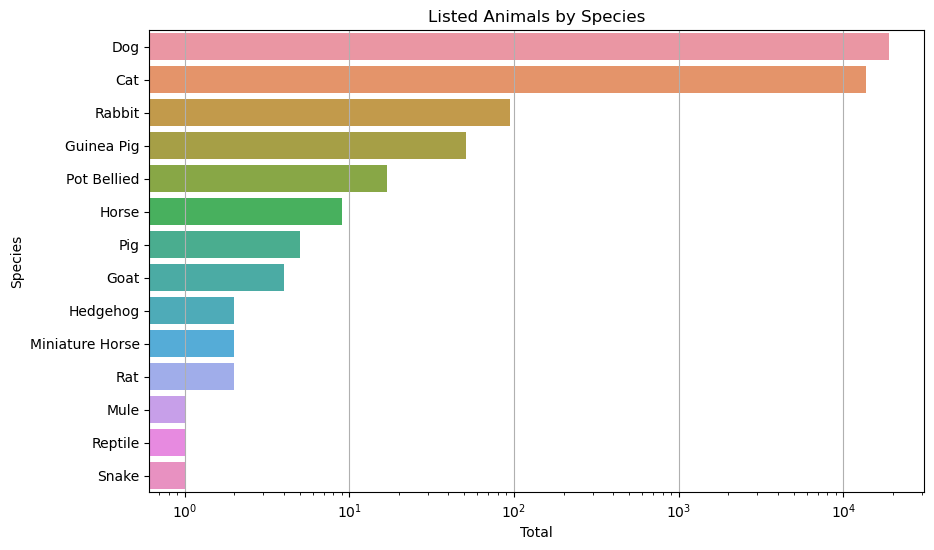

In [10]:
listed = df.groupby('species')['id'].count().reset_index(name='count').sort_values('count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='species', data=listed)
plt.title('Listed Animals by Species')
plt.xlabel('Total')
plt.ylabel('Species')
plt.xscale('log')
plt.grid(axis='x')

plt.show()

What types of animal species are available for adoption vs how many were adopted in 2023? What types of animals are listed the most frequently?

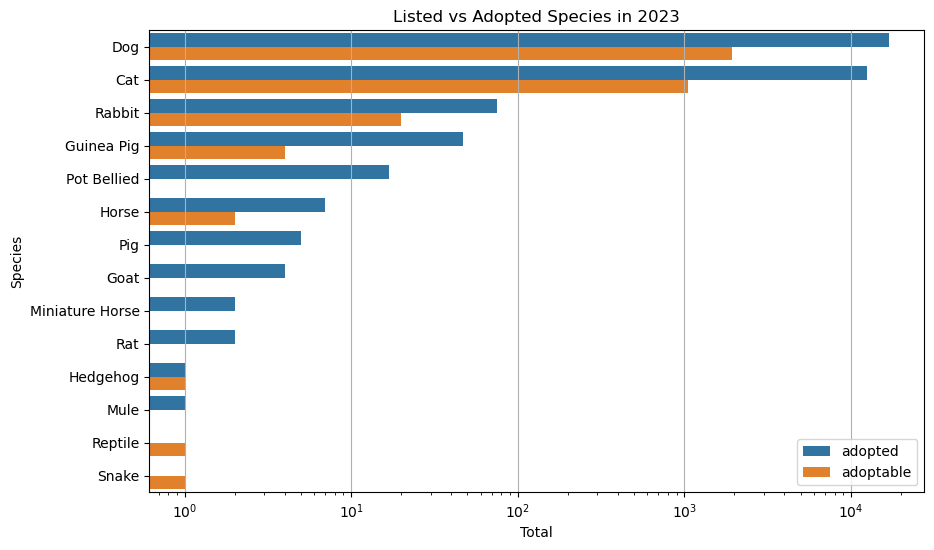

In [11]:
listed_vs_adopted = df.groupby(['species', 'status'])['id'].count().reset_index(name='count').sort_values('count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='species', data=listed_vs_adopted, hue='status')
plt.title('Listed vs Adopted Species in 2023')
plt.xlabel('Total')
plt.ylabel('Species')
plt.xscale('log')
plt.grid(axis='x')
plt.legend(loc='lower right')

plt.show()

#### What is the adoption rate by species? 

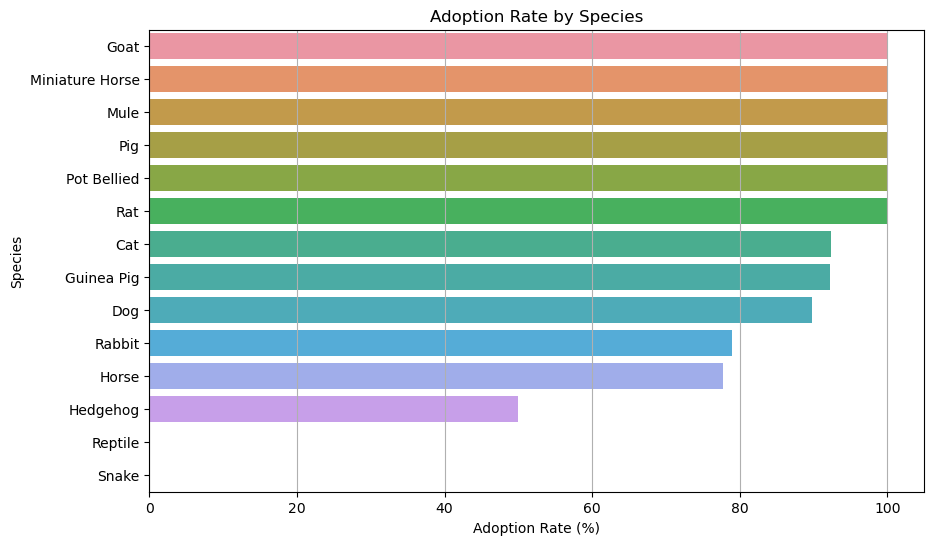

In [12]:
# Group and count for adopted and total
total_by_species = df.groupby('species')['id'].count().reset_index(name='count_total')
adopted_by_species = adopted.groupby('species')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
species_ar = pd.merge(total_by_species, adopted_by_species, on='species', how='outer')

# Fill NaNs
species_ar['count_adopted'] = species_ar['count_adopted'].fillna(0)

# Add new column and calculate adoption rate + round
species_ar['adoption rate %'] = round((species_ar['count_adopted'] / species_ar['count_total']) * 100, 2)
species_ar = species_ar.sort_values('adoption rate %', ascending=False)



# Plot in barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='adoption rate %', y='species', data=species_ar)
plt.xlabel('Adoption Rate (%)')
plt.ylabel('Species')
plt.title('Adoption Rate by Species')
plt.grid(axis='x')

plt.show()

#Note: Cats have a higher adoption rate than dogs - there are more dogs

## Q3. Does age, gender, or size impact possibility for adoption?

What is the distribution of age by species for adopted animals?

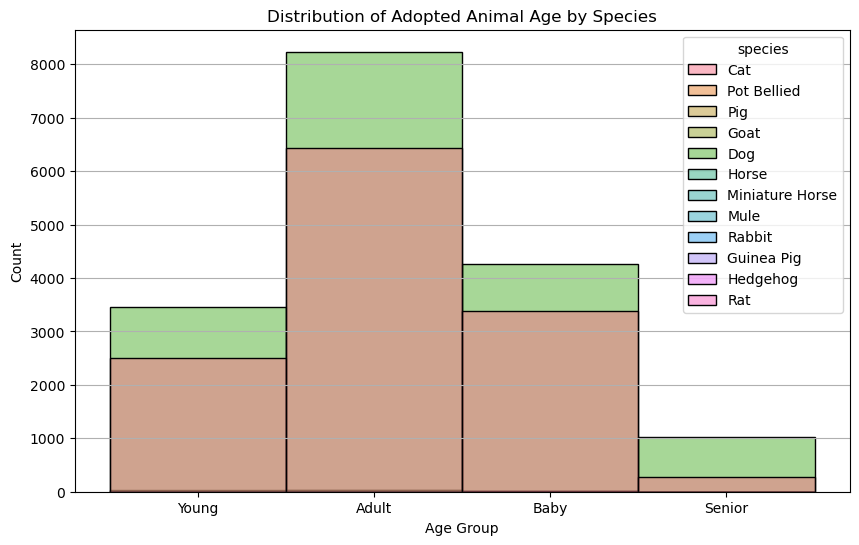

In [13]:
adopted = df[df['status'] == 'adopted']

plt.figure(figsize=(10, 6))
sns.histplot(data=adopted, x='age', hue='species')
plt.title('Distribution of Adopted Animal Age by Species')
plt.xlabel('Age Group')
plt.ylabel('Count')
#plt.yscale('log')
plt.grid(axis='y')

plt.show()

What is the adoption rate by age group? Which age groups have the highest and lowest adoption rates?

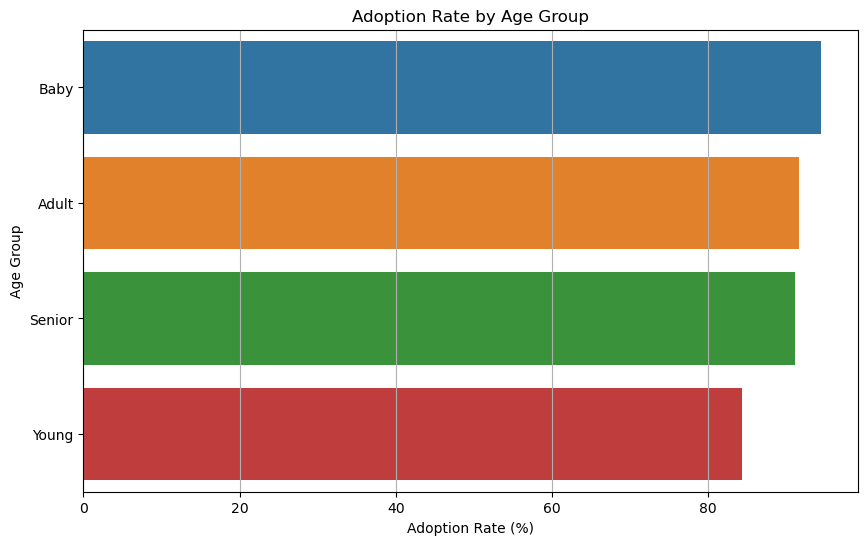

,age,count_total,count_adopted,adoption rate %
1,Baby,8112,7668,94.53
0,Adult,16078,14741,91.68
2,Senior,1441,1313,91.12
3,Young,7126,6013,84.38


In [14]:
# Group and count for adopted and total
total_by_age = df.groupby('age')['id'].count().reset_index(name='count_total')
adopted_by_age = adopted.groupby('age')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
age_ar = pd.merge(total_by_age, adopted_by_age, on='age', how='outer')

# Add new column and calculate adoption rate + round
age_ar['adoption rate %'] = round((age_ar['count_adopted'] / age_ar['count_total']) * 100, 2)
age_ar = age_ar.sort_values('adoption rate %', ascending=False)

# Plot as barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='adoption rate %', y='age', data=age_ar)
plt.xlabel('Adoption Rate (%)')
plt.ylabel('Age Group')
plt.title('Adoption Rate by Age Group')
plt.grid(axis='x')
plt.show()

age_ar

# 'Young' age group has a lower adoption rate - What is considered young vs adult?

What is the distribution of gender by species?

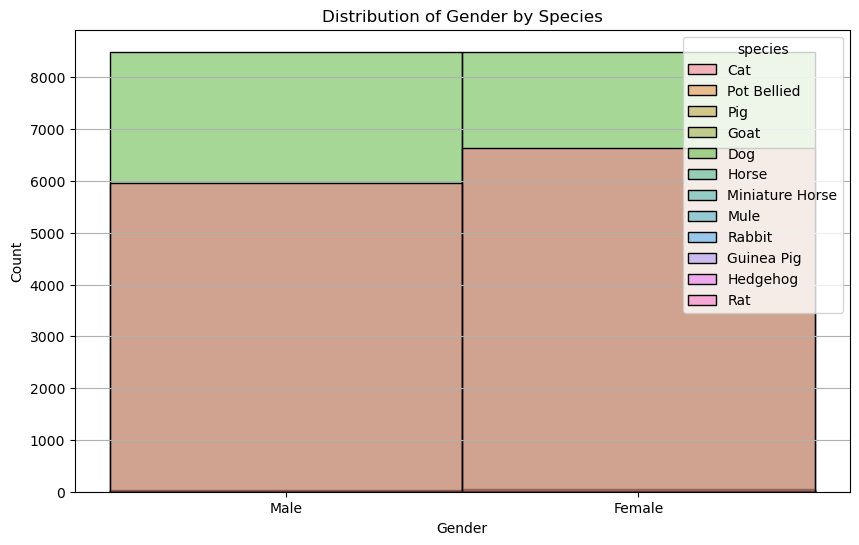

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=adopted, x='gender', hue='species')
plt.title('Distribution of Gender by Species')
plt.xlabel('Gender')
plt.ylabel('Count')
#plt.yscale('log')
plt.grid(axis='y')

plt.show()

What is the adoption rate by gender group? Which gender groups have the highest and lowest adoption rates?

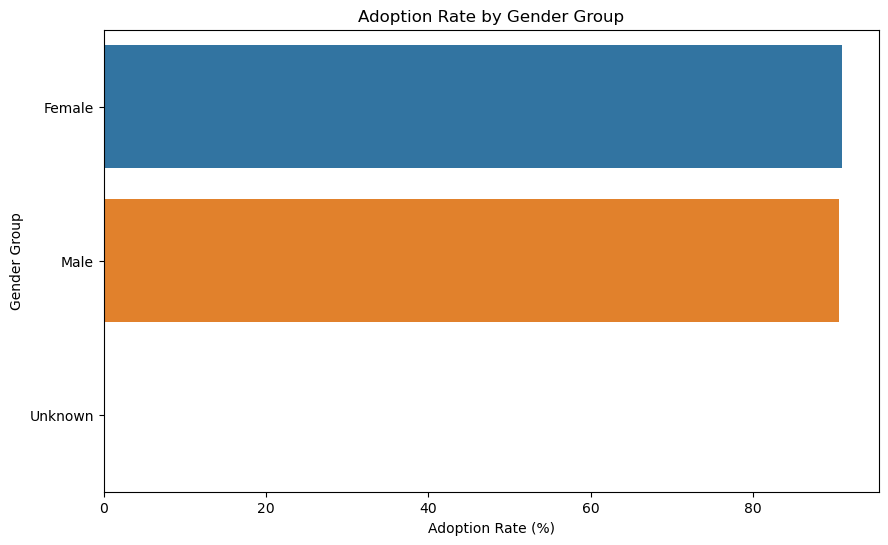

,gender,count_total,count_adopted,adoption rate %
0,Female,16732,15221.0,90.97
1,Male,16023,14514.0,90.58
2,Unknown,2,0.0,NaN


In [16]:
# Group and count for adopted and total
total_by_gender = df.groupby('gender')['id'].count().reset_index(name='count_total')
adopted_by_gender = adopted.groupby('gender')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
gender_ar = pd.merge(total_by_gender, adopted_by_gender, on='gender', how='outer')

# Add new column and calculate adoption rate + round
gender_ar['adoption rate %'] = round((gender_ar['count_adopted'] / gender_ar['count_total']) * 100, 2)

# Fill NaNs
gender_ar['count_adopted'] = gender_ar['count_adopted'].fillna(0)

gender_ar = gender_ar.sort_values('adoption rate %', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='adoption rate %', y='gender', data=gender_ar)
plt.xlabel('Adoption Rate (%)')
plt.ylabel('Gender Group')
plt.title('Adoption Rate by Gender Group')
plt.show()

gender_ar

# Gender does not impact adoption rate
# Unknown genders are 1 reptile & 1 snake 

What is the distribution of size group by species?

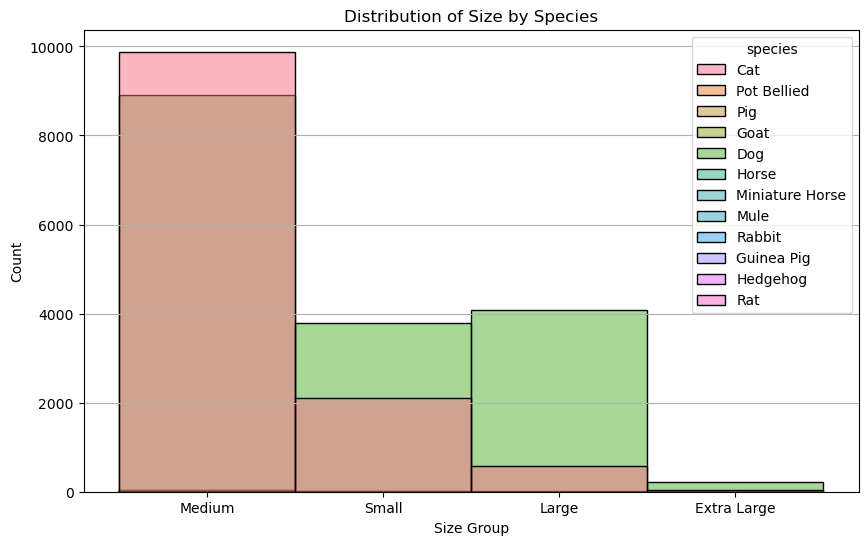

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=adopted, x='size', hue='species')
plt.title('Distribution of Size by Species')
plt.xlabel('Size Group')
plt.ylabel('Count')
#plt.yscale('log')
plt.grid(axis='y')

plt.show()

What is the adoption rate by size group? Which size groups have the highest and lowest adoption rates?

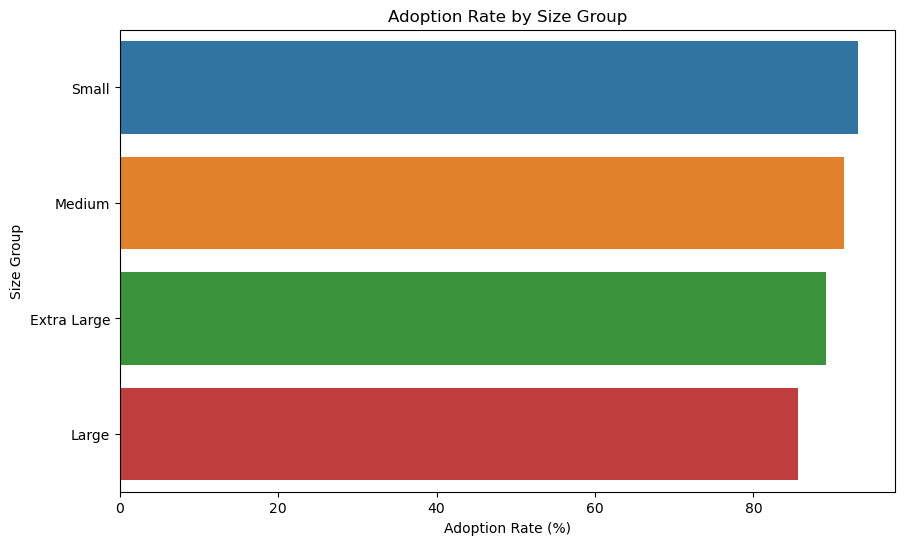

,size,count_total,count_adopted,adoption rate %
3,Small,6358,5925,93.19
2,Medium,20659,18882,91.40
0,Extra Large,286,255,89.16
1,Large,5454,4673,85.68


In [18]:
# Group and count for adopted and total
total_by_size = df.groupby('size')['id'].count().reset_index(name='count_total')
adopted_by_size = adopted.groupby('size')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
size_ar = pd.merge(total_by_size, adopted_by_size, on='size', how='outer')

# Add new column and calculate adoption rate + round
size_ar['adoption rate %'] = round((size_ar['count_adopted'] / size_ar['count_total']) * 100, 2)
size_ar = size_ar.sort_values('adoption rate %', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='adoption rate %', y='size', data=size_ar)
plt.xlabel('Adoption Rate (%)')
plt.ylabel('Size Group')
plt.title('Adoption Rate by Size Group')
plt.show()

size_ar

# Smaller dogs are slightly more likely to be adopted

## Q4. Are there patterns or trends related to how quickly an animal is adopted in TN? 

What is the overall average adoption speed?

In [19]:
avg_at = round(adopted['adoption_time'].mean())
print('Average Adoption Time:', avg_at, 'days')

Average Adoption Time: 17 days


What is the average adoption rate by species?

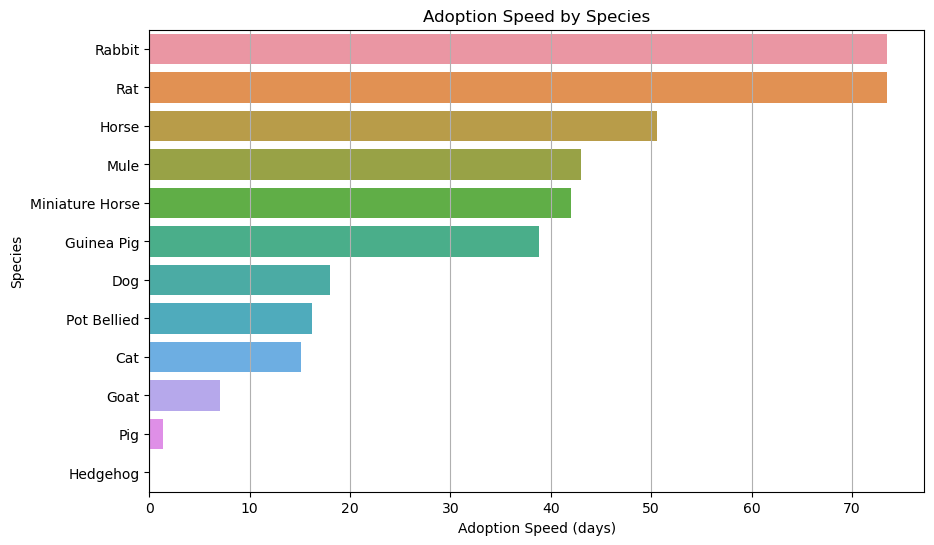

In [20]:
species_at = adopted.groupby('species')['adoption_time'].mean().reset_index(name='Avg Adoption Time').sort_values('Avg Adoption Time', ascending=False)
species_at['Avg Adoption Time'] = round(species_at['Avg Adoption Time'], 2) 

plt.figure(figsize=(10, 6))
sns.barplot(x='Avg Adoption Time', y='species', data=species_at)
plt.xlabel('Adoption Speed (days)')
plt.ylabel('Species')
plt.title('Adoption Speed by Species')
plt.grid(axis='x')
plt.show()

What is the distribution of adoption time?

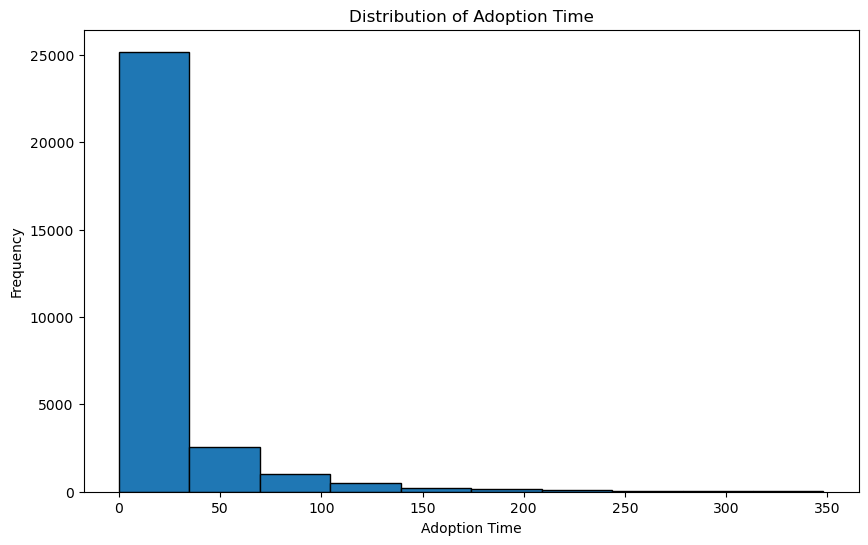

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(adopted['adoption_time'], bins=10, edgecolor='black')
plt.xlabel('Adoption Time')
plt.ylabel('Frequency')
plt.title('Distribution of Adoption Time')
plt.show()

# Most animals are likely to be adopted between 0 and 50 days

Does an animals age impact adoption speed?

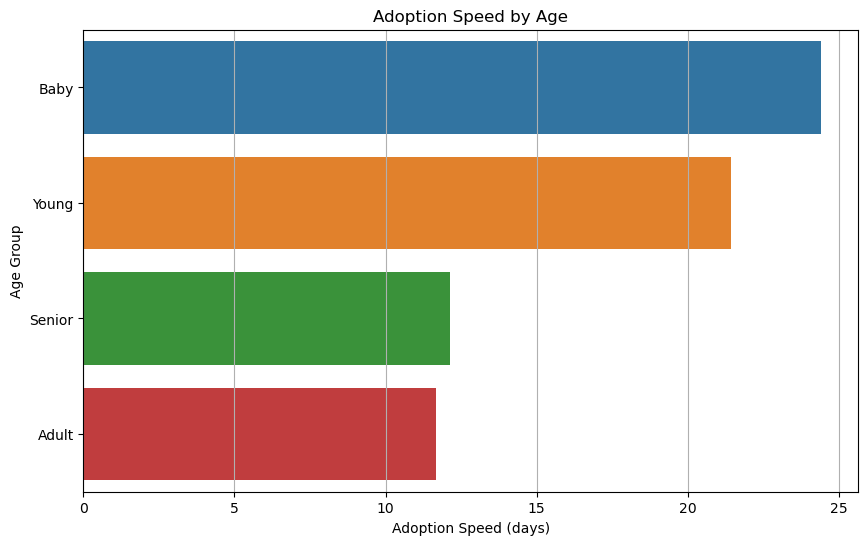

In [22]:
age_at = adopted.groupby('age')['adoption_time'].mean().reset_index(name='Avg Adoption Time').sort_values('Avg Adoption Time', ascending=False)
age_at['Avg Adoption Time'] = round(age_at['Avg Adoption Time'], 2) 

plt.figure(figsize=(10, 6))
sns.barplot(x='Avg Adoption Time', y='age', data=age_at)
plt.xlabel('Adoption Speed (days)')
plt.ylabel('Age Group')
plt.title('Adoption Speed by Age')
plt.grid(axis='x')
plt.show()

Does an animals gender impact adoption speed?

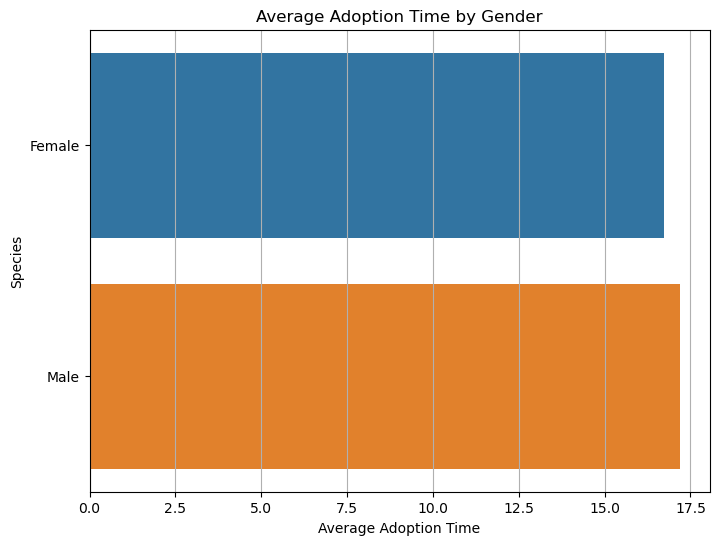

In [23]:
gender_at = adopted.groupby('gender')['adoption_time'].mean().reset_index(name='avg_at').sort_values('avg_at', ascending=True)

plt.figure(figsize=(8, 6))  
sns.barplot(x='avg_at', y='gender', orient='h', data=gender_at)
plt.xlabel('Average Adoption Time')
plt.ylabel('Species')
plt.title('Average Adoption Time by Gender')
plt.grid(axis='x')
plt.show()

# Slight difference, but not significant

#### Does an animals size impact adoption speed?

Size vs Adoption Speed

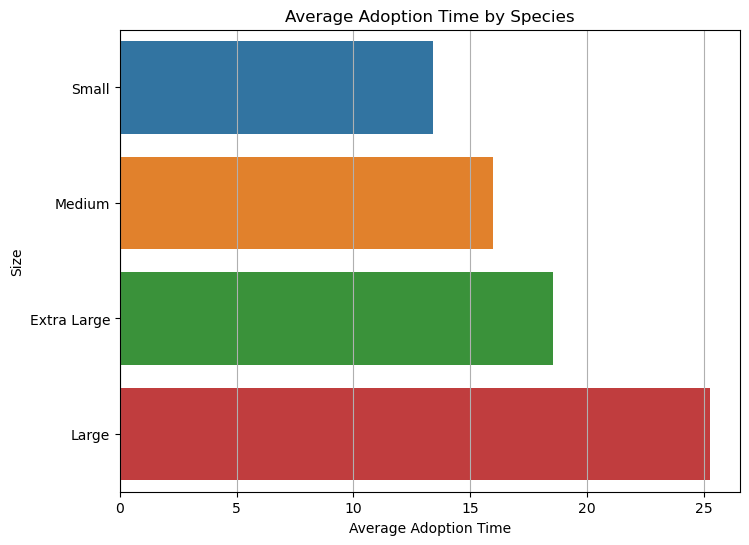

In [24]:
size_at = adopted.groupby('size')['adoption_time'].mean().reset_index(name='avg_at').sort_values('avg_at', ascending=True)

plt.figure(figsize=(8, 6))  
sns.barplot(x='avg_at', y='size', orient='h', data=size_at)
plt.xlabel('Average Adoption Time')
plt.ylabel('Size')
plt.title('Average Adoption Time by Species')
plt.grid(axis='x')
plt.show()

# Smaller animals are preferred over larger animals and are adopted faster

### Seasonality Trends

## Q5. Does seasonality impact adoption speed?

How does the number of listed pets compare to the number of pet adoptions on a monthly basis?

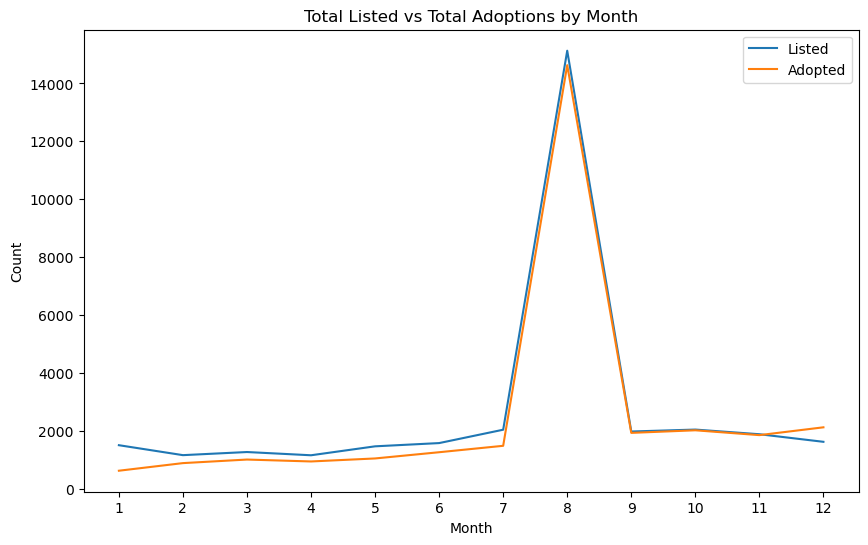

In [25]:
monthly_listed = df.groupby('month_published')['id'].count().reset_index(name='count')
monthly_adopted = adopted.groupby('month_status_change')['id'].count().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_listed, x='month_published', y='count', label='Listed')
sns.lineplot(data=monthly_adopted, x='month_status_change', y='count', label='Adopted')
plt.title('Total Listed vs Total Adoptions by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13)) 
plt.legend()

plt.show()

# Note: The number of adopted pets increases slightly as the year goes on, and number of pets listed is consistent
# Note: There is a correlation between listed vs adopted 
# Note: There is a huge spike in listed/adopted pets between july and september (peaks in august)

What is the average adoption speed by month? Are there any trends?

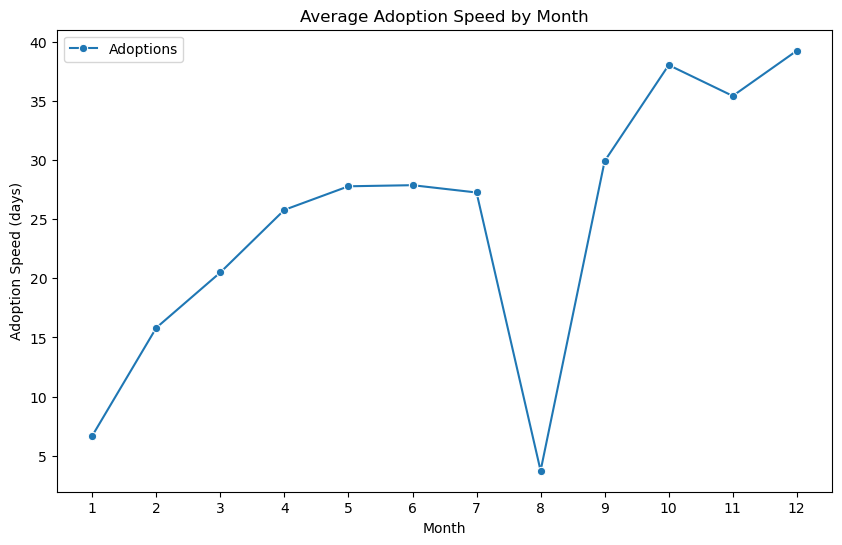

In [26]:
monthly_adoptions = adopted.groupby('month_status_change')['adoption_time'].mean()

plt.figure(figsize=(10, 6))

sns.lineplot(data=monthly_adoptions, marker='o', label='Adoptions')

plt.title('Average Adoption Speed by Month')
plt.xlabel('Month')
plt.ylabel('Adoption Speed (days)')
plt.xticks(range(1, 13)) 
#plt.legend()

plt.show()

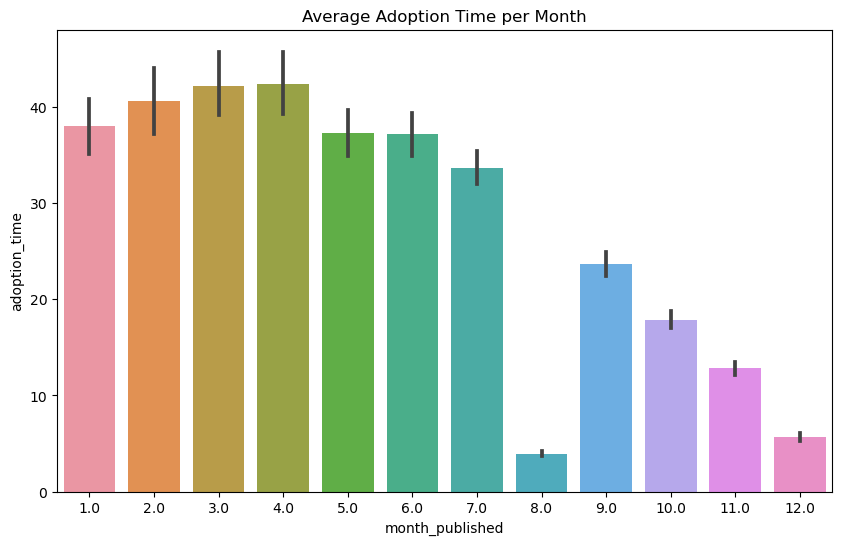

In [27]:
plt.figure(figsize=(10, 6))

sns.barplot(data=adopted, x='month_published', y='adoption_time')
plt.title('Average Adoption Time per Month')
plt.show()

What is the relationship between adoption time and listing date for pet adoptions?

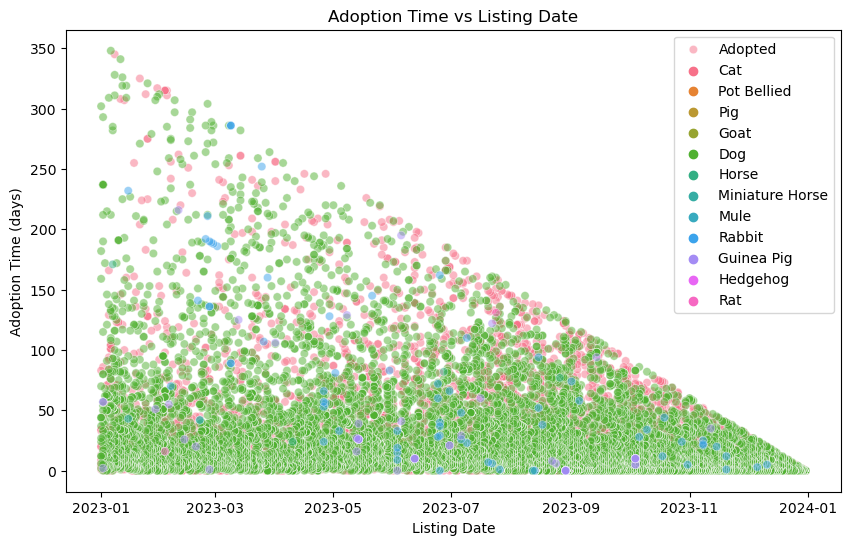

In [28]:
plt.figure(figsize=(10, 6))

# Plot adopted pets
sns.scatterplot(data=adopted, x='published_date', y='adoption_time', hue='species', alpha=0.5, label='Adopted')
#sns.scatterplot(data=adopted, x='month_published', y='adoption_time', alpha=0.5, label='Adopted')
# Plt pets not adopted in 2023
#sns.scatterplot(data=available, x='published_date', y='days_available', color='red', alpha=0.5, label='Pets Available')


plt.title('Adoption Time vs Listing Date')
plt.ylabel('Adoption Time (days)')
plt.xlabel('Listing Date')

plt.legend()

plt.show()

# Animals tend to be adopted relatively quickly (between 0-50 days) and adoption time seems to decrease if pets are adopted as time goes on through the year

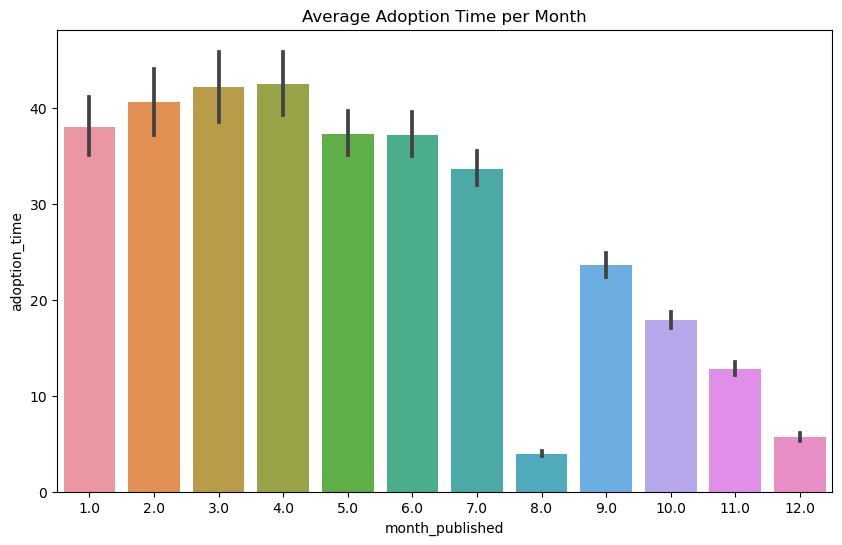

In [29]:
plt.figure(figsize=(10, 6))

sns.barplot(data=adopted, x='month_published', y='adoption_time')
plt.title('Average Adoption Time per Month')
plt.show()


What are the peak days and hours for animal adoptions?

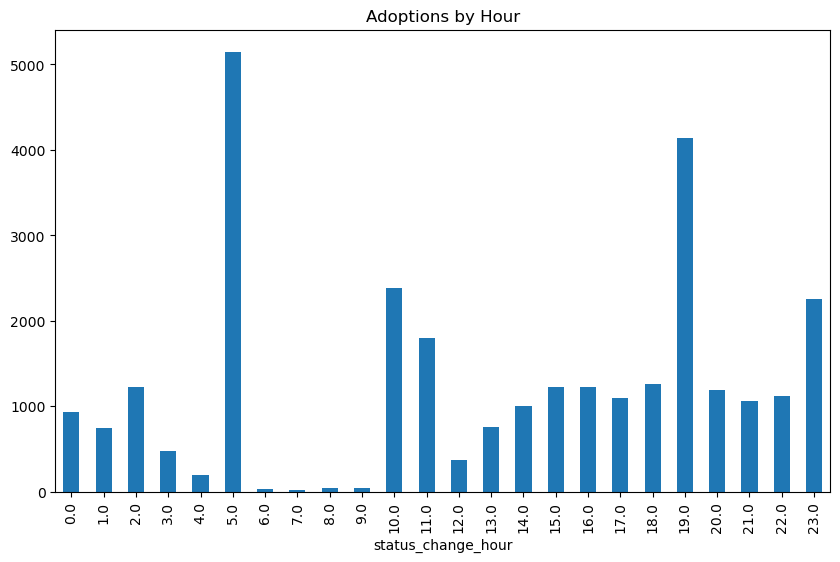

In [30]:
plt.figure(figsize=(10, 6))
adopted.groupby('status_change_hour').count()['id'].plot(kind='bar')
plt.title('Adoptions by Hour')
plt.show()

# Status changes do not accurately reflect adotptions

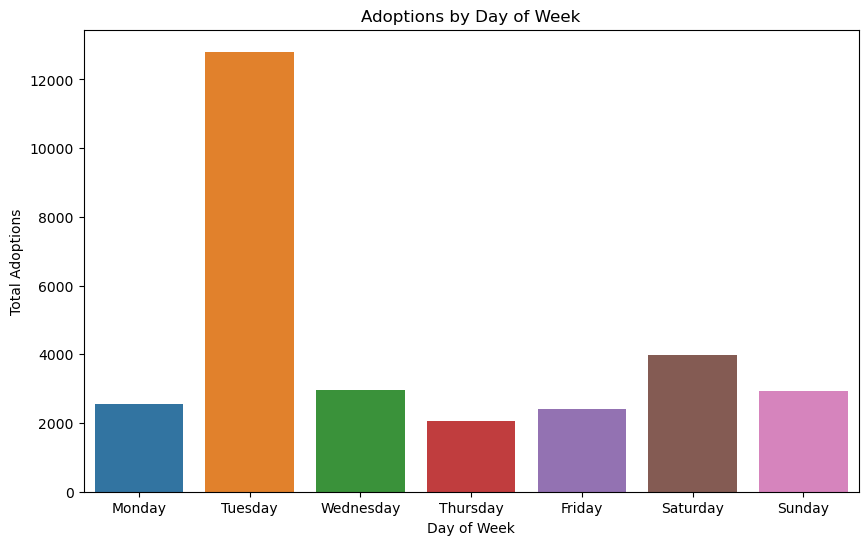

In [31]:
order_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.countplot(data=adopted, x='status_change_dow', order=order_list)
plt.title('Adoptions by Day of Week')
plt.ylabel('Total Adoptions')
plt.xlabel('Day of Week')
plt.show()

# Tuesday's seem to be the most popular day for adoptions

Is there a trend in adoptions by day of the month?

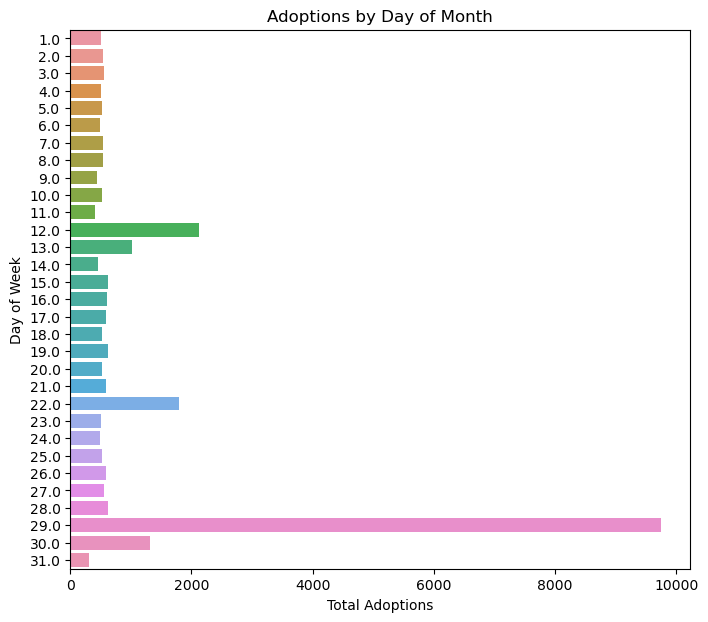

In [32]:
plt.figure(figsize=(8, 7))
sns.countplot(data=adopted, y='day_status_change')
plt.title('Adoptions by Day of Month')
plt.ylabel('Day of Week')
plt.xlabel('Total Adoptions')
plt.show()

# Adoptions seem to spike towards the middle and the end of the month

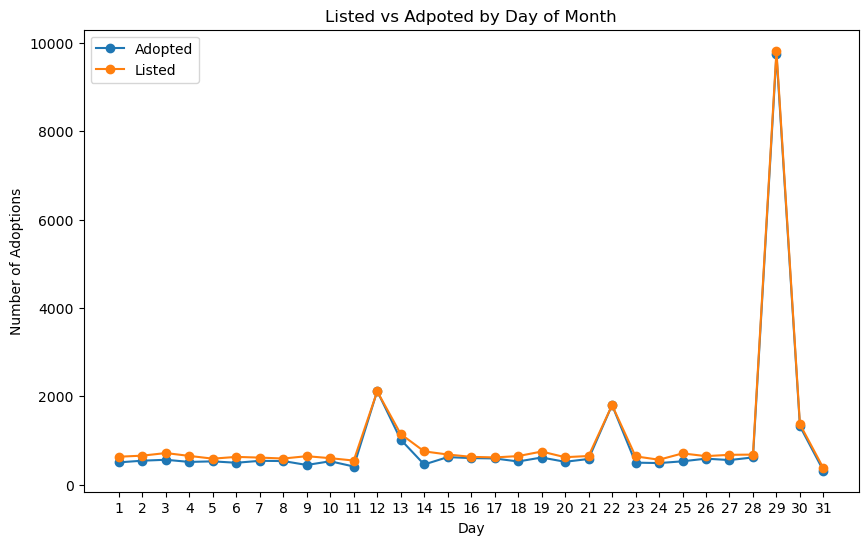

In [33]:
daily_adoptions = adopted.groupby('day_status_change')['id'].count()
daily_published = df.groupby('day_published')['id'].count()

plt.figure(figsize=(10, 6))

daily_adoptions.plot(kind='line', marker='o', label='Adopted')
daily_published.plot(kind='line', marker='o', label='Listed')

plt.title('Listed vs Adpoted by Day of Month')
plt.xlabel('Day')
plt.ylabel('Number of Adoptions')
plt.xticks(range(1, 32)) 
plt.legend()

plt.show()

# More animals are being listed than are being adopted each day of the month
# Peaks might be due to weekends, holidays, or paydays
# Peaks at end of the month might be due to pay days 

Why is there a spike in adoptions on the 29th of the month?

In [34]:
day_29 = adopted[(adopted['day_status_change'] == 29) & (adopted['status_change_dow'] == 'Tuesday')]

day_29.groupby(['status_change_dow', 'status_change_hour'])['id'].count()

# Most adoptions occured on Tuesday
# Adoption updates might be made on Tuesdays? 

status_change_dow  status_change_hour
Tuesday            0.0                      7
                   1.0                    106
                   2.0                     17
                   5.0                   5045
                   6.0                      1
                   8.0                      8
                   12.0                     2
                   13.0                     2
                   14.0                     2
                   16.0                     7
                   18.0                     2
                   19.0                  2861
                   20.0                     4
                   22.0                    10
                   23.0                  1188
Name: id, dtype: int64

#### Is there a specific time of year where animals are more likely to be adopted?

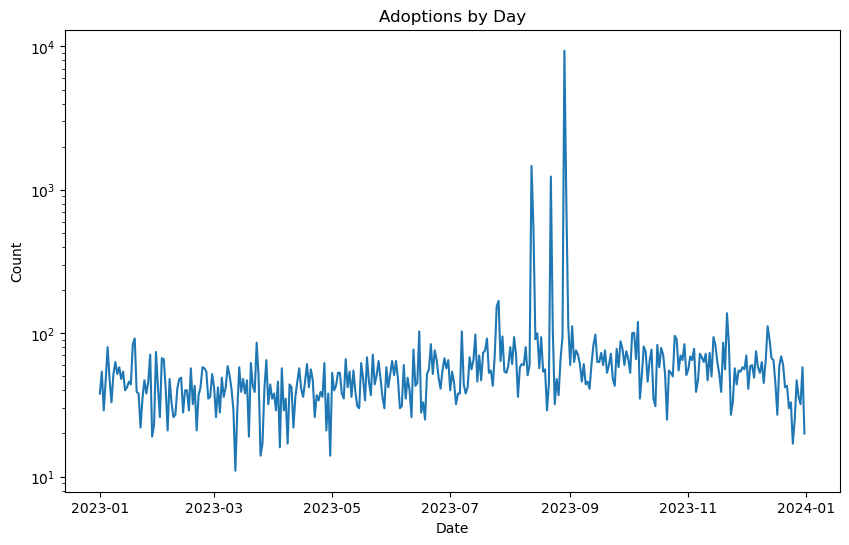

,status_change_date,count
0,2023-01-02,2
1,2023-01-03,2
2,2023-01-04,4
3,2023-01-05,9
4,2023-01-06,14
...,...,...
359,2023-12-27,73
360,2023-12-28,66
361,2023-12-29,61
362,2023-12-30,112


In [35]:
date_adoptions = adopted.groupby('status_change_date')['id'].count().reset_index(name='count')
date_published = df.groupby('published_date')['id'].count().reset_index(name='count')

date_adoptions['status_change_date'] = pd.to_datetime(date_adoptions['status_change_date'])

plt.figure(figsize=(10, 6))

#sns.lineplot(x='status_change_date', y='count', data=date_adoptions)
sns.lineplot(x='published_date', y='count', data=date_published)
plt.title('Adoptions by Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

date_adoptions

## Q6. How do adoption rates vary across different regions within TN?

How many cities in TN were animals available for adoptions?

In [36]:
df['contact.address.city'].nunique()

KeyError: 'contact.address.city'

What is the adoption rate % per city?

In [ ]:
# Group and count for adopted and total
total_by_city = df.groupby('contact.address.city')['id'].count().reset_index(name='count_total')
adopted_by_city = adopted.groupby('contact.address.city')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
city_ar = pd.merge(total_by_city, adopted_by_city, on='contact.address.city', how='outer')

# Add new column and calculate adoption rate + round
city_ar['adoption rate %'] = round((city_ar['count_adopted'] / city_ar['count_total']) * 100, 2)
city_ar = city_ar.sort_values('count_total', ascending=False)

print(city_ar.head(10)) # Top 10 cities
print(city_ar.tail(10)) # Bottom 10

What is the adoption rate per county?

In [ ]:
# Import US Zips from https://simplemaps.com/data/us-zips
zipcodes = pd.read_csv('..//data/uszips.csv')
print(zipcodes.shape)
#zipcodes.head()

In [ ]:
# Subset on state_name to get only TN data
zips = zipcodes[zipcodes['state_name'] == 'Tennessee']

# Count zips
zips['state_id'].count()

In [ ]:
# Merge dataframes together on postcode
loc_df = pd.merge(df, zips, left_on='contact.address.postcode', right_on='zip', how='left')

In [ ]:
# Drop unnecessary columns
drop = [
    'organization_id', 'url', 'tags', 'name', 
    'description', 'attributes.spayed_neutered',
    'attributes.house_trained', 'attributes.declawed',
    'attributes.special_needs', 'attributes.shots_current',
    'environment.children', 'environment.dogs', 'environment.cats', 
    'contact.address.state', 'zip', 'city', 'state_id', 'state_name', 
    'zcta', 'parent_zcta', 'county_fips',  
    'county_weights', 'county_fips_all', 'imprecise', 'military',
    'timezone'
]
loc_df.drop(drop, axis=1, inplace=True)

In [ ]:
#loc_df.columns

In [ ]:
total_by_county = loc_df.groupby('county_name')['id'].count().reset_index(name='count_total').sort_values('count_total', ascending=False)

adopted_loc = loc_df[loc_df['status'] == 'adopted']
adopted_by_county = adopted_loc.groupby('county_name')['id'].count().reset_index(name='count_adopted').sort_values('count_adopted', ascending=False)

# Merge two dataframes together
county_ar = pd.merge(total_by_county, adopted_by_county, on='county_name', how='outer')

# Add new column and calculate adoption rate + round
county_ar['adoption rate %'] = round((county_ar['count_adopted'] / county_ar['count_total']) * 100, 2)
county_ar = county_ar.sort_values('count_adopted', ascending=False)

print(county_ar.head(10)) # Top 10
print(county_ar.tail(10)) # Bottom 10 - Note - bottom 10 had no adoptions despite the number of animals

By Region

In [ ]:
# Put counties in respective regions manually into dictionary
# Copied from wiki https://en.wikipedia.org/wiki/Grand_Divisions_of_Tennessee
east = {
    'Anderson': 'East', 'Bledsoe': 'East', 'Blount': 'East', 'Bradley': 'East', 
    'Campbell': 'East', 'Carter': 'East', 'Claiborne': 'East','Cocke': 'East', 
    'Cumberland': 'East', 'Grainger': 'East', 'Greene': 'East', 'Hamblen': 'East',
    'Hamilton': 'East','Hancock': 'East','Hawkins': 'East', 'Jefferson': 'East', 
    'Johnson': 'East', 'Knox': 'East', 'Loudon': 'East', 'Marion': 'East', 
    'McMinn': 'East', 'Meigs': 'East', 'Monroe': 'East', 'Morgan': 'East',
    'Polk': 'East', 'Rhea': 'East', 'Roane': 'East', 'Scott': 'East', 
    'Sevier': 'East', 'Sullivan': 'East', 'Unicoi': 'East', 'Union': 'East', 
    'Washington': 'East'
}

middle = {
    'Bedford': 'Middle', 'Cannon': 'Middle', 'Cheatham': 'Middle', 'Clay': 'Middle',
    'Coffee': 'Middle', 'Davidson': 'Middle', 'DeKalb': 'Middle', 'Dickson': 'Middle',
    'Fentress': 'Middle', 'Franklin': 'Middle', 'Giles': 'Middle', 'Grundy': 'Middle',
    'Hickman': 'Middle', 'Houston': 'Middle', 'Humphreys': 'Middle', 'Jackson': 'Middle',
    'Lawrence': 'Middle', 'Lewis': 'Middle', 'Lincoln': 'Middle', 'Macon': 'Middle',
    'Marshall': 'Middle', 'Maury': 'Middle', 'Montgomery': 'Middle', 'Moore': 'Middle',
    'Overton': 'Middle', 'Perry': 'Middle', 'Pickett': 'Middle', 'Putnam': 'Middle',
    'Robertson': 'Middle', 'Rutherford': 'Middle', 'Sequatchie': 'Middle', 'Smith': 'Middle',
    'Stewart': 'Middle', 'Sumner': 'Middle', 'Trousdale': 'Middle', 'Van Buren': 'Middle',
    'Warren': 'Middle', 'Wayne': 'Middle', 'White': 'Middle', 'Williamson': 'Middle',
    'Wilson': 'Middle'
}

west = {
    'Benton': 'West', 'Carroll': 'West', 'Chester': 'West', 'Crockett': 'West',
    'Decatur': 'West', 'Dyer': 'West', 'Fayette': 'West', 'Gibson': 'West',
    'Hardeman': 'West', 'Hardin': 'West', 'Haywood': 'West', 'Henderson': 'West',
    'Henry': 'West', 'Lake': 'West', 'Lauderdale': 'West', 'Madison': 'West',
    'McNairy': 'West', 'Obion': 'West', 'Shelby': 'West', 'Tipton': 'West',
    'Weakley': 'West'
}

In [ ]:
#test = loc_df[['county_name']]

In [ ]:
# Create function that adds returns region if county is in dictionaries east, west, middle
def add_county(county):
    if county in east:
        return 'East'
    elif county in middle:
        return 'Middle'
    elif county in west:
        return 'West'

In [ ]:
# test['region'] = test['county_name'].apply(add_county)
# test.groupby('region')['county_name'].count()

In [ ]:
# Create new column and apply function 
loc_df['region'] = loc_df['county_name'].apply(add_county)

# Check 
loc_df[['county_name', 'region']]

#loc_df.info()

# Convert region to string
loc_df['region'] = loc_df['region'].astype('string')

#loc_df.info()

In [ ]:
loc_df.columns

In [ ]:
adopted_loc = loc_df[loc_df['status'] == 'adopted']

In [ ]:
# Group
total_by_region = loc_df.groupby('region')['id'].count().reset_index(name='count_total')
adopted_by_region = adopted_loc.groupby('region')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
region_ar = pd.merge(total_by_region, adopted_by_region, on='region', how='outer')

# Add new column and calculate adoption rate + round
region_ar['adoption rate %'] = round((region_ar['count_adopted'] / region_ar['count_total']) * 100, 2)
region_ar = region_ar.sort_values('count_adopted', ascending=False)
#region_ar.info()

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x='region', y='adoption rate %', data=region_ar)

plt.title('Adoption Rate by Region')
plt.ylabel('Count')
plt.xlabel('Region')

plt.show()

# What are the key factors influencing the adoption dynamics for the most frequently posted animals in TN?

### Pivoting to just cats and dogs

In [ ]:
# Create dataframes for just dogs & cats
dogs = df[df['species'] == 'Dog']
adopted_dogs = dogs[dogs['status'] == 'adopted']

cats = df[df['species'] == 'Cat']
adopted_cats = cats[cats['status'] == 'adopted']

both = df[df['species'].isin(['Dog', 'Cat'])]

#### What is the overall adoption rate for cats vs dogs?

In [ ]:
# Calculate cat adoption rate
adopted_cats = cats[cats['status'] == 'adopted'] 
adopted_cat_count = adopted_cats['id'].count()
cat_ar = round((adopted_cat_count / cats['id'].count()) * 100, 2)

# Calculate dog adoption rate
adopted_dogs = dogs[dogs['status'] == 'adopted'] 
adopted_dog_count = adopted_dogs['id'].count()
dog_ar = round((adopted_dog_count / dogs['id'].count()) * 100, 2)

# Calculate adoption rate for both dogs and cats combined
adopted_both = both[both['status'] == 'adopted']
adopted_both_count = adopted_both['id'].count()
both_ar = round((adopted_both_count / both['id'].count()) * 100, 2)

print('Cat Adoption Rate:', cat_ar, '%')
print('Dog Adoption Rate:', dog_ar, '%')
print('Cats & Dog Combined Adoption Rate:', both_ar, '%')

#### What is the distribution of cats vs dogs?

In [ ]:
species_count = both['species'].value_counts()

plt.figure(figsize=(10, 6))

plt.pie(species_count, labels=species_count.index, autopct='%1.1f%%') 

plt.title('Distribution of Dogs vs Cats')

plt.show() 

## Q1. Are there specific species and breeds that are more likely to be adopted?

#### Which breeds are adopted most frequently? What is the adoption rate by breed? 

DOGS

In [37]:
total_by_breed = dogs.groupby('breeds.primary')['id'].count().reset_index(name='count_total').sort_values('count_total', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='count_total', y='breeds.primary', data=total_by_breed)
plt.xlabel('Total Listed')
plt.ylabel('Breeds')
plt.title('Top 20 Dogs Listed for Adoption by Primary Breed')
plt.show()

# Mixed & Full Breed Dogs
# Labs are the top listed dogs

NameError: name 'dogs' is not defined

In [ ]:
# Group and count for adopted and total
total_by_breed = dogs.groupby('breeds.primary')['id'].count().reset_index(name='count_total')
adopted_by_breed = adopted_dogs.groupby('breeds.primary')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
breeds_ar = pd.merge(total_by_breed, adopted_by_breed, on='breeds.primary', how='outer')

# Add new column and calculate adoption rate + round
breeds_ar['adoption rate %'] = round((breeds_ar['count_adopted'] / breeds_ar['count_total']) * 100, 2)
breeds_ar = breeds_ar.sort_values('count_total', ascending=False).head(20) # Sort top 20 most frequently posted
breeds_ar = breeds_ar.sort_values('adoption rate %', ascending=False) # Sort adoption rate %

# Plot in barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='adoption rate %', y='breeds.primary', data=breeds_ar)
plt.xlabel('Adoption Rate (%)')
plt.ylabel('Breeds')
plt.title('Top 20 Most Frequently Listed Dogs by Primary Breed and Adoption Rate %')
plt.show()

breeds_ar


In [ ]:
# 
labs_listed = dogs[dogs['breeds.primary'] == 'Labrador Retriever']
labs_listed = labs_listed.groupby('breeds.mixed')['id'].count()
labs_adopted = adopted[adopted['breeds.primary'] == 'Labrador Retriever']
labs_adopted = labs_adopted.groupby('breeds.mixed')['id'].count()
print(labs_listed)
print(labs_adopted)

CATS 

In [ ]:
# Group and count for adopted and total
total_by_breed = cats.groupby('breeds.primary')['id'].count().reset_index(name='count_total')
adopted_by_breed = adopted_cats.groupby('breeds.primary')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
breeds_ar = pd.merge(total_by_breed, adopted_by_breed, on='breeds.primary', how='outer')

# Add new column and calculate adoption rate + round
breeds_ar['adoption rate %'] = round((breeds_ar['count_adopted'] / breeds_ar['count_total']) * 100, 2)
breeds_ar = breeds_ar.sort_values('count_total', ascending=False).head(20) # Sort top 20 most frequently posted
breeds_ar = breeds_ar.sort_values('adoption rate %', ascending=False) # Sort adoption rate %

# Plot in barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='adoption rate %', y='breeds.primary', data=breeds_ar)
plt.xlabel('Adoption Rate (%)')
plt.ylabel('Breeds')
plt.title('Top 20 Most Frequently Listed Cats and Adoption Rate %')
plt.show()

breeds_ar

## Q2. Does breed mix (full vs mixed) impact the possibility for adoption?

#### What is the distribution of adoption time for full breed vs mixed breed dogs/cats?

In [ ]:
full = dogs[(dogs['breeds.mixed'] == 'False') & (dogs['status'] == 'adopted')]
mixed = dogs[(dogs['breeds.mixed'] == 'True') & (dogs['status'] == 'adopted')]

plt.figure(figsize=(10, 6))

sns.histplot(mixed['adoption_time'], bins=10, color='red', label='Mixed Breeds')
sns.histplot(full['adoption_time'], bins=10, color='blue', label='Full Breed')


plt.title('Distribution of Adoption Time for Mixed Breed vs Full Breed Dogs')
plt.xlabel('Adoption Time (days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print('Full Breed', full['id'].count())
print('Mixed Breed', mixed['id'].count())
print(round((full['id'].count() / mixed['id'].count() * 100),2),'% of Dogs Adopted are Full Breed')
# Less full breed dogs

In [ ]:
plt.figure(figsize=(10, 6))

# Plot adopted pets
sns.scatterplot(data=adopted_both, x='published_date', y='adoption_time', hue='species', alpha=0.5)
#sns.scatterplot(data=adopted, x='month_published', y='adoption_time', alpha=0.5, label='Adopted')
# Plt pets not adopted in 2023
#sns.scatterplot(data=available, x='published_date', y='days_available', color='red', alpha=0.5, label='Pets Available')


plt.title('Adoption Time vs Listing Date')
plt.ylabel('Adoption Time (days)')
plt.xlabel('Listing Date')

plt.legend()

plt.show()

# Animals tend to be adopted relatively quickly (between 0-50 days) and adoption time seems to decrease if pets are adopted as time goes on through the year

In [ ]:
full = cats[(cats['breeds.mixed'] == 'False') & (cats['status'] == 'adopted')]
mixed = cats[(cats['breeds.mixed'] == 'True') & (cats['status'] == 'adopted')]

plt.figure(figsize=(10, 6))

sns.histplot(full['adoption_time'], bins=10, color='blue', label='Full Breed')
sns.histplot(mixed['adoption_time'], bins=10, color='red', label='Mixed Breeds')

plt.title('Distribution of Adoption Time for Mixed Breed vs Full Breed Cats')
plt.xlabel('Adoption Time (days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print('Full Breed', full['id'].count())
print('Mixed Breed', mixed['id'].count())
print(round((mixed['id'].count() / full['id'].count() * 100),2),'% of Cats Adopted are Mixed Breed')

# More full breed cats

#### What is the adoption rate for full vs mixed breed for cats & dogs?

In [ ]:
# Group
total = dogs.groupby('breeds.mixed')['id'].count().reset_index(name='count_total')
total_adopted = adopted_dogs.groupby('breeds.mixed')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
breedmix_ar = pd.merge(total, total_adopted, on='breeds.mixed', how='outer')

breedmix_ar['adoption rate %'] = round((breedmix_ar['count_adopted'] / breedmix_ar['count_total']) * 100, 2)

breedmix_ar

In [ ]:
# Group
total = cats.groupby('breeds.mixed')['id'].count().reset_index(name='count_total')
total_adopted = adopted_cats.groupby('breeds.mixed')['id'].count().reset_index(name='count_adopted')

# Merge two dataframes together
breedmix_ar = pd.merge(total, total_adopted, on='breeds.mixed', how='outer')

breedmix_ar['adoption rate %'] = round((breedmix_ar['count_adopted'] / breedmix_ar['count_total']) * 100, 2)
breedmix_ar

# relatively small difference - no impact

## Does age, gender, or size impact possibility for adoption?

What is the average adoption speed for age, gender, and size?

#### Dogs

In [ ]:
adopted_dogs = dogs[dogs['status'] == 'adopted']
adopted_dogs = adopted_dogs.groupby('age')['id'].count().reset_index(name='count_adopted')
listed_dogs = dogs.groupby('age')['id'].count().reset_index(name='count_listed')
dogs_ar = pd.merge(adopted_dogs, listed_dogs, on='age', how='outer')
dogs_ar['adoption rate %'] = round((dogs_ar['count_adopted'] / dogs_ar['count_listed']) * 100, 2)
dogs_ar


In [ ]:
adopted_dogs = dogs[dogs['status'] == 'adopted']
adopted_dogs = adopted_dogs.groupby('size')['id'].count().reset_index(name='count_adopted')
listed_dogs = dogs.groupby('size')['id'].count().reset_index(name='count_listed')
dogs_ar = pd.merge(adopted_dogs, listed_dogs, on='size', how='outer')
dogs_ar['adoption rate %'] = round((dogs_ar['count_adopted'] / dogs_ar['count_listed']) * 100, 2)
dogs_ar

In [ ]:
adopted_dogs = dogs[dogs['status'] == 'adopted']
adopted_dogs = adopted_dogs.groupby('gender')['id'].count().reset_index(name='count_adopted')
listed_dogs = dogs.groupby('gender')['id'].count().reset_index(name='count_listed')
dogs_ar = pd.merge(adopted_dogs, listed_dogs, on='gender', how='outer')
dogs_ar['adoption rate %'] = round((dogs_ar['count_adopted'] / dogs_ar['count_listed']) * 100, 2)
dogs_ar

#### Cats

In [ ]:
adopted_cats = cats[cats['status'] == 'adopted']
adopted_cats = adopted_cats.groupby('age')['id'].count().reset_index(name='count_adopted')
listed_cats = cats.groupby('age')['id'].count().reset_index(name='count_listed')
cats_ar = pd.merge(adopted_cats, listed_cats, on='age', how='outer')
cats_ar['adoption rate %'] = round((cats_ar['count_adopted'] / cats_ar['count_listed']) * 100, 2)
cats_ar

In [ ]:
adopted_cats = cats[cats['status'] == 'adopted']
adopted_cats = adopted_cats.groupby('size')['id'].count().reset_index(name='count_adopted')
listed_cats = cats.groupby('size')['id'].count().reset_index(name='count_listed')
cats_ar = pd.merge(adopted_cats, listed_cats, on='size', how='outer')
cats_ar['adoption rate %'] = round((cats_ar['count_adopted'] / cats_ar['count_listed']) * 100, 2)
cats_ar

In [ ]:
adopted_cats = cats[cats['status'] == 'adopted']
adopted_cats = adopted_cats.groupby('gender')['id'].count().reset_index(name='count_adopted')
listed_cats = cats.groupby('gender')['id'].count().reset_index(name='count_listed')
cats_ar = pd.merge(adopted_cats, listed_cats, on='gender', how='outer')
cats_ar['adoption rate %'] = round((cats_ar['count_adopted'] / cats_ar['count_listed']) * 100, 2)
cats_ar

## Are there patterns or trends related to how quickly an cats/dogs are adopted?

What is the average adoption speed for cats vs dogs?

In [ ]:
both.groupby('species')['adoption_time'].mean().reset_index(name='Avg Adoption Speed')

In [ ]:
adopted_cats = cats[cats['status'] == 'adopted']
adopted_dogs = dogs[dogs['status'] == 'adopted']

plt.figure(figsize=(10, 6))

plt.hist(adopted_dogs['adoption_time'], bins=5, edgecolor='black', label='Dogs', color='blue')
plt.hist(adopted_cats['adoption_time'], bins=5, edgecolor='black', label='Cats', color='red')

plt.xlabel('Adoption Time')
plt.ylabel('Frequency')
plt.title('Distribution of Adoption Time Cats vs Dogs')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(adopted_cats['adoption_time'], fill=True, color='red', label='Cats')
sns.kdeplot(adopted_dogs['adoption_time'], fill=True, color='blue', label='Dogs')


plt.title('Adoption Time Distribution Between Cats & Dogs')
plt.xlabel('Adoption Time (days)')
plt.xscale('log')
plt.legend()
plt.show()

#### Does age impact adoption speed?

In [ ]:
both_adopted = both[both['status'] == 'adopted']

avg_adoption_time = both_adopted.groupby(['age', 'species'])['adoption_time'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=avg_adoption_time, x='age', y='adoption_time', hue='species')
plt.title('Average Adoption Time of Cats vs Dogs by Age Group')
plt.xlabel('Age')
plt.ylabel('Average Adoption Time (days)')

plt.show()

avg_adoption_time

In [ ]:
avg_adoption_time = both_adopted.groupby(['gender', 'species'])['adoption_time'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=avg_adoption_time, x='gender', y='adoption_time', hue='species')
plt.title('Average Adoption Time of Cats vs Dogs by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Adoption Time (days)')

plt.show()

avg_adoption_time

In [ ]:
avg_adoption_time = both_adopted.groupby(['size', 'species'])['adoption_time'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=avg_adoption_time, x='size', y='adoption_time', hue='species')
plt.title('Average Adoption Time of Cats vs Dogs by Size')
plt.xlabel('Size')
plt.ylabel('Average Adoption Time (days)')

plt.show()

avg_adoption_time

## Does Seasonality impact adoptions between cats and dogs?

In [ ]:
avg_adoption_time = both_adopted.groupby(['month_status_change', 'species'])['adoption_time'].count().reset_index(name='adoption_time')

plt.figure(figsize=(12, 8))
sns.lineplot(data=avg_adoption_time, x='month_status_change', y='adoption_time', hue='species', marker='o')
plt.title('Dog and Cat Adoptions by Month')
plt.xlabel('Total Number of Adoptions')
plt.ylabel('Month')
plt.xticks(range(1, 13))

plt.show()

#avg_adoption_time

In [ ]:
both.columns

In [ ]:
count_adopted = both_adopted.groupby(['status_change_date', 'species'])['id'].count().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.lineplot(data=count_adopted, x='status_change_date', y='count', hue='species')
plt.title('Dog and Cat Adoptions by Day')
plt.xlabel('Date')
plt.ylabel('Total Number of Adoptions')
plt.yscale('log')

plt.show()

count_adopted

### Group by week?